In [1]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import cross_validate, train_test_split
from statistics import mean 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
d = pd.read_csv('processedData.csv')

In [3]:
y = d['class'] #sets y to be class column 
X = d.iloc[:,0:(d.shape[1]-1)] #sets X to be dataset with class column removed 

In [4]:
#double checking that X does not have the label column (leaving the labels as a feature is a common mistake): 
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [5]:
#Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [6]:
##SVM 
from sklearn import svm
modelSVM = svm.SVC(gamma=0.001, C=100.) 
modelSVM.fit(X_train, y_train)
print(classification_report(y_test,modelSVM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89      1828
           1       0.00      0.00      0.00       472

    accuracy                           0.79      2300
   macro avg       0.40      0.50      0.44      2300
weighted avg       0.63      0.79      0.70      2300



c:\program files\python37\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
#80% might seem  pretty bad considering the fact that we only have two classes 
#and one of them makes up 80% of the dataset...
#However, the precision and recall and f-score aren't 0, which means 
#the model is still learning at least.
#Still, everything is quite low. 

In [8]:
#I proceed to try some more simple non-deep learning models: 

In [9]:
##Logistic regression: 
from sklearn import linear_model
modelLR = linear_model.LogisticRegression(C=1e5, max_iter=1000)    
modelLR.fit(X_train, y_train)
print(classification_report(y_test, modelLR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1828
           1       0.95      0.11      0.20       472

    accuracy                           0.82      2300
   macro avg       0.88      0.56      0.55      2300
weighted avg       0.84      0.82      0.75      2300



c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
##Random forests
from sklearn.ensemble import RandomForestClassifier
modelRF=RandomForestClassifier(n_estimators=1000)   
modelRF.fit(X_train, y_train)
print(classification_report(y_test, modelRF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1828
           1       0.95      0.93      0.94       472

    accuracy                           0.97      2300
   macro avg       0.96      0.96      0.96      2300
weighted avg       0.97      0.97      0.97      2300



In [11]:
##Neural network: 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [12]:
modelNeuralNet = MLPClassifier(hidden_layer_sizes=(5,5,5), max_iter=500) 
#3 hidden layers with 13 neurons in each layer 
modelNeuralNet.fit(X_train, y_train)
print(classification_report(y_test,modelNeuralNet.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1828
           1       0.91      0.88      0.89       472

    accuracy                           0.96      2300
   macro avg       0.94      0.93      0.93      2300
weighted avg       0.96      0.96      0.96      2300



In [13]:
#Definitely room for improvement on all 4 baselines.
#The slower ones (RF, NN) have higher performance as expected
#I tried out some other models. kNN performs similarly to SVM and logistic regression, 
#and adaboost and GBMs perform similarly to the random forest. 
#But to keep our presentation from getting cluttered, let's just stick to these
#4 baseline models 

In [14]:
#Cross validations (could only do 3 fold):

In [15]:
SVM_cv_results = cross_validate(modelSVM, X, y, cv=3) 

In [16]:
LR_cv_results = cross_validate(modelLR, X, y, cv=3)

c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

In [17]:
NeuralNet_cv_results = cross_validate(modelNeuralNet, X, y, cv=3)

In [18]:
RF_cv_results = cross_validate(modelRF, X, y, cv=3)

In [19]:
print("Accuracies:")
print("SVM_cv_results: " + str(mean(SVM_cv_results['test_score'])))
print("LR_cv_results: " + str(mean(LR_cv_results['test_score'])))
print("NeuralNet_cv_results: " + str(mean(NeuralNet_cv_results['test_score'])))
print("RandomForest_cv_results: " + str(mean(RF_cv_results['test_score'])))

Accuracies:
SVM_cv_results: 0.8000000045364676
LR_cv_results: 0.8223479368122687
NeuralNet_cv_results: 0.9439992355144806
RandomForest_cv_results: 0.974521768988281


In [20]:
print("Training times:")
print("SVM_cv_results: " + str(mean(SVM_cv_results['fit_time'])))
print("LR_cv_results: " + str(mean(LR_cv_results['fit_time'])))
print("NeuralNet_cv_results: " + str(mean(NeuralNet_cv_results['fit_time'])))
print("RandomForest_cv_results: " + str(mean(RF_cv_results['fit_time'])))

Training times:
SVM_cv_results: 63.57625985145569
LR_cv_results: 3.0736148357391357
NeuralNet_cv_results: 10.491767009099325
RandomForest_cv_results: 148.41069642702737


In [21]:
print("Prediction times:")
print("SVM_cv_results: " + str(mean(SVM_cv_results['score_time'])))
print("LR_cv_results: " + str(mean(LR_cv_results['score_time'])))
print("NeuralNet_cv_results: " + str(mean(NeuralNet_cv_results['score_time'])))
print("RandomForest_cv_results: " + str(mean(RF_cv_results['score_time'])))

Prediction times:
SVM_cv_results: 8.91124709447225
LR_cv_results: 0.005208015441894531
NeuralNet_cv_results: 0.010067224502563477
RandomForest_cv_results: 1.3545056978861492


In [22]:
graphingY=[mean(SVM_cv_results['test_score']), 
   mean(LR_cv_results['test_score']),
   mean(NeuralNet_cv_results['test_score']),
   mean(RF_cv_results['test_score'])]

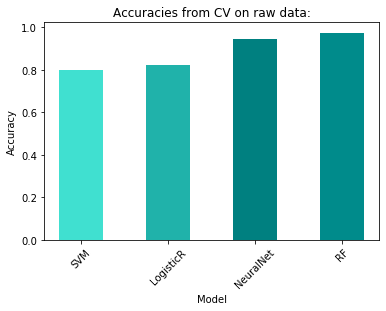

In [23]:
xLabels=("SVM","LogisticR","NeuralNet","RF")
x = np.arange(4)

colours = ['turquoise','lightseagreen','teal',"darkcyan"]
plt.bar(x, graphingY, width=0.5, color=colours)
plt.xticks(x, xLabels, rotation=45)

plt.title("Accuracies from CV on raw data:")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

In [24]:
#The cross validation stuff is in reportingFramework.py
#In the other notebooks, we'll just use this method to keep things concise

from CVreportingFramework import hugeFramework
hugeFramework(modelSVM, modelLR, modelNeuralNet, modelRF, X, y)

c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Accuracies:
SVM_cv_results: 0.8000000045364676
LR_cv_results: 0.8223479368122687
NeuralNet_cv_results: 0.9288695036555537
RandomForest_cv_results: 0.9735652774778039

Training times:
SVM_cv_results: 68.79273184140523
LR_cv_results: 3.713141600290934
NeuralNet_cv_results: 14.130476156870523
RandomForest_cv_results: 149.98129645983377

Prediction times:
SVM_cv_results: 9.958036184310913
LR_cv_results: 0.010134458541870117
NeuralNet_cv_results: 0.01755682627360026
RandomForest_cv_results: 1.3544005552927654
